##**Практическое задание по теме «Проверка гипотез»**


**Задание:**

**Цель задания**:
Научиться проверять гипотезы.

**Описание задания**:
Кризис пройден. Стажировка продолжается. Теперь Вас определили в
отдел аналитики маркетплейса, где необходимо поработать с данными ecommerce.
Вам предстоит изучить активность магазина в различных
регионах, чтобы выстроить стратегию развития.
1. Используйте датасет data_hw_2_(upd).xlsx Как работать с файлом .
2. Постройте гистограммы плотности распределения объёмов продаж
для Франции и Германии и определите типы распределений.
3. С помощью стат. критериев сравните объёмы продаж во Франции и
Германии:
Гипотеза: «Объёмы продаж Франции отличаются от объёмов продаж
Германии».
4. Сделайте выводы по результатам проверки.
Примечание: базовые гипотезы всегда формулируются одинаково,
нулевая гипотеза гласит, что выборки значимо не отличаются,
альтернативная – наоборот; проверяемая гипотеза всегда является
альтернативной.
Результат ДЗ предоставьте в виде ссылки на документ или файл.
Выполните задание в любом из инструментов: Google Таблицы, Google
Colaboratory (Python), Excel.
Убедитесь, что к google-таблице или ноутбуку предоставлен доступ по
ссылке, иначе преподаватель не сможет проверить работу. Для этого
можно открыть браузер в режиме инкогнито и убедиться, что ссылки
открываются корректно.


##**Решение**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('data_hw_2__upd_.xlsx')
df.head()

,InvoiceNo,CustomerID,Country,InvoiceDate,Description,TotalPrice
0,537693,12441,France,2010-12-08,WRAP I LOVE LONDON,51.11
1,537693,12441,France,2010-12-08,VINTAGE CARAVAN GIFT WRAP,43.61
2,537693,12441,France,2010-12-08,BLUE SCANDINAVIAN PAISLEY WRAP,73.08
3,537693,12441,France,2010-12-08,PAPER CHAIN KIT VINTAGE CHRISTMAS,39.17
4,537693,12441,France,2010-12-08,PAPER CHAIN KIT 50'S CHRISTMAS,57.48


In [ ]:
# Формирование выборок
df_1 = df[df['Country'] == 'France']
df_2 = df[df['Country'] == 'Germany']

print('Выборки имеют одинаковую длинну: ', len(df_1) == len(df_2))

Выборки имеют одинаковую длинну:  True


Визуализация доверительных интервалов

<ipython-input-6-bbb140e2cddd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['TotalPrice'], 50)
<ipython-input-6-bbb140e2cddd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2['TotalPrice'], 50)


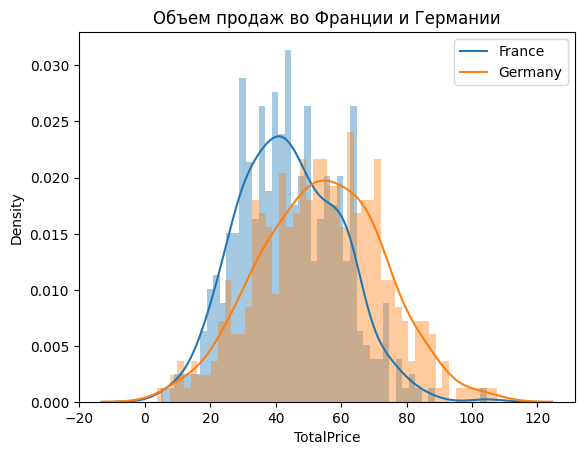

In [ ]:
sns.distplot(df_1['TotalPrice'], 50)
sns.distplot(df_2['TotalPrice'], 50)
plt.title('Объем продаж во Франции и Германии')
plt.legend(['France', 'Germany'])
plt.show()

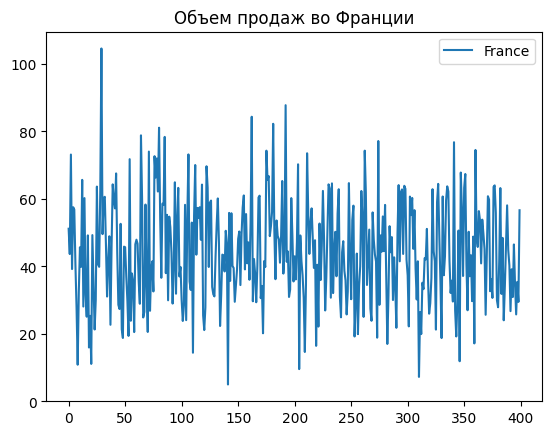

In [ ]:
# Визуализация для Франции
plt.plot(df_1['TotalPrice'])
plt.title('Объем продаж во Франции')
plt.legend(['France'])
plt.show()

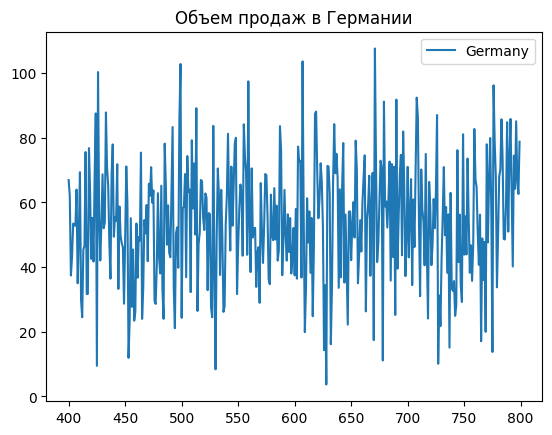

In [ ]:
# Визуализация для Германии
plt.plot(df_2['TotalPrice'])
plt.title('Объем продаж в Германии')
plt.legend(['Germany'])
plt.show()

Гипотеза: «Объёмы продаж Франции отличаются от объёмов продаж Германии».

Подключения библиотек статистических критериев и задание уровня значимости

In [ ]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

alpha = 0.05

Проведение Т-Теста (t-критерий Стьюдента)

In [ ]:
result = ttest_ind(df_1['TotalPrice'], df_2['TotalPrice'])
print('p-value: %.8f' % result.pvalue)

if (result.pvalue < alpha):
    print(' Отвергаем гипотезу')
else:
    print('Не отвергаем гипотезу')

p-value: 0.00000000
 Отвергаем гипотезу


In [ ]:
# Объемы продаж во Франции статистически значимо не отличаются от объемов продаж в Германии

Проведение теста Манна — Уитни (U-критерий Манна — Уитни)

In [ ]:
result = mannwhitneyu(df_1['TotalPrice'], df_2['TotalPrice'])
print('p-value: %.8f' % result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем гипотезу')
else:
    print('Не отвергаем гипотезу')

p-value: 0.00000000
Отвергаем гипотезу


In [ ]:
# Объемы продаж во Франции статистически значимо не отличаются от объемов продаж в Германии